 <font color='purple'><h1><center>Explatory Data Analysis for [Step Project](https://www.kaggle.com/c/iba-ml2-mid-project)</center></h1>

In [1]:
#importing main libraries;

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing preprocessing features;
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures

#scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

#encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#imputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#importing algortihms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier




#pipeline
from sklearn.pipeline import Pipeline
from IPython.core.display import HTML
from sklearn.utils import estimator_html_repr

#outlier detection
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

#metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

%matplotlib inline

<i>Importing  the Train and Test datasets.

In [2]:
df = pd.read_csv('train.csv', index_col='Id') #We don't really need the ID column to be found in the train dataset, 
                                              #therefore I setting it as index

In [3]:
df_test = pd.read_csv('test.csv', index_col='Id') #For reporting purposes, I am keeping ID column.

## Train dataset

<i>Basic look on dataset

In [4]:
df.head(7) #can obviously see the many "Not a Number" values in the dataset.

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
Id,,,,,,,,,,,
1,66.0,NaN,4000.0,NaN,1.0,0.569108,0.05488766900000001,0.0,0.0,0.0,0
2,61.0,2.0,4000.0,6.0,1.0,0.297176,0.10194991099999999,0.0,0.0,0.0,0
3,31.0,2.0,3040.0,8.0,0.0,0.160145,1.22713507,4.0,0.0,0.0,1
4,54.0,4.0,10218.0,5.0,0.0,0.067913,0.08327777900000001,0.0,0.0,0.0,0
5,29.0,0.0,4468.0,6.0,0.0,0.328261,0.317445504,0.0,0.0,0.0,0
6,39.0,2.0,4166.0,17.0,1.0,NaN,NaN,1.0,0.0,0.0,0
7,30.0,2.0,4585.0,1.0,0.0,0.087004,0.9999998999999999,1.0,NaN,4.0,0


In [5]:
df.tail(7) #can obviously see the many "Not a Number" values here as well.

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
Id,,,,,,,,,,,
72155,45.0,0.0,9483.0,7.0,1.0,0.244306,0.037742528,0.0,0.0,0.0,0
72156,45.0,0.0,3773.0,7.0,1.0,NaN,0.074780108,0.0,0.0,NaN,0
72157,70.0,0.0,9584.0,13.0,3.0,0.429943,0.145213501,1.0,0.0,0.0,0
72158,51.0,NaN,6374.0,15.0,2.0,0.667608,0.445703733,0.0,0.0,0.0,0
72159,58.0,0.0,4333.0,NaN,1.0,0.413475,0.048434473,0.0,0.0,0.0,0
72160,58.0,2.0,6466.0,14.0,2.0,0.420288,0.447265776,0.0,0.0,0.0,0
72161,50.0,0.0,7500.0,10.0,1.0,0.304626,0.8737087640000001,2.0,3.0,0.0,0


In [6]:
df.shape

(72161, 11)

In [7]:
print(f'The shape of the train dataset is: {df.shape}.')

The shape of the train dataset is: (72161, 11).


<b><i> There are <font color='red'>11</font> columns and <font color='red'>72,161</font> rows in our train dataset.

In [8]:
df.columns.to_list()    # We can see the list of names of columns.

['age',
 'number_dependent_family_members',
 'monthly_income',
 'number_of_credit_lines',
 'real_estate_loans',
 'ratio_debt_payment_to_income',
 'credit_line_utilization',
 'number_of_previous_late_payments_up_to_59_days',
 'number_of_previous_late_payments_up_to_89_days',
 'number_of_previous_late_payments_90_days_or_more',
 'defaulted_on_loan']

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72161 entries, 1 to 72161
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   age                                               65017 non-null  float64
 1   number_dependent_family_members                   67945 non-null  float64
 2   monthly_income                                    66145 non-null  float64
 3   number_of_credit_lines                            66007 non-null  float64
 4   real_estate_loans                                 68355 non-null  float64
 5   ratio_debt_payment_to_income                      66553 non-null  float64
 6   credit_line_utilization                           65815 non-null  object 
 7   number_of_previous_late_payments_up_to_59_days    67966 non-null  float64
 8   number_of_previous_late_payments_up_to_89_days    66316 non-null  float64
 9   number_of_previou

<b> Except our <font color='red'>target</font> column (defaulted_on_loan), we have one column (credit_line_utilization) with  <font color='red'>object</font> DataType.

<i>Later, we will change(astype) type of <font color='red'>credit_line_utilization</font> column to float.

In [10]:
df.isna().sum()  

age                                                 7144
number_dependent_family_members                     4216
monthly_income                                      6016
number_of_credit_lines                              6154
real_estate_loans                                   3806
ratio_debt_payment_to_income                        5608
credit_line_utilization                             6346
number_of_previous_late_payments_up_to_59_days      4195
number_of_previous_late_payments_up_to_89_days      5845
number_of_previous_late_payments_90_days_or_more    3621
defaulted_on_loan                                      0
dtype: int64

<i> We can see quite a lot missing values existing in each of the columns.

In [11]:
df.isna().sum().sum()

52951

In [12]:
print(f'Total number of missing values is {df.isna().sum().sum()}.')

Total number of missing values is 52951.


<i>We have missing values in all of the columns except target column.

<i>As we have missing values for all of the columns, we have to thoroughly analyze each column in order to choose best <font color='red'>imputation strategy.

<AxesSubplot:ylabel='Id'>

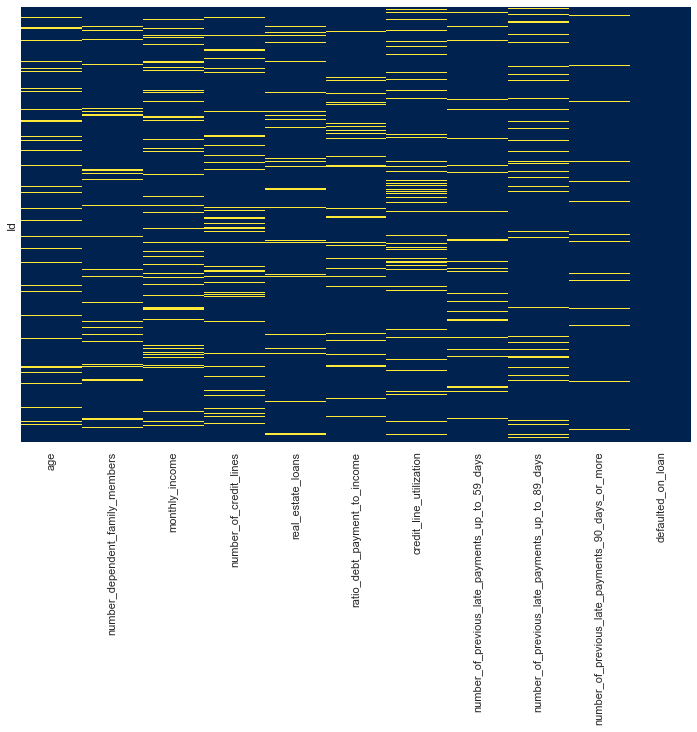

In [13]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap= 'cividis')  #We can see the visualized versin of missing values.

In [14]:
df.count() #numer of non-missing values

age                                                 65017
number_dependent_family_members                     67945
monthly_income                                      66145
number_of_credit_lines                              66007
real_estate_loans                                   68355
ratio_debt_payment_to_income                        66553
credit_line_utilization                             65815
number_of_previous_late_payments_up_to_59_days      67966
number_of_previous_late_payments_up_to_89_days      66316
number_of_previous_late_payments_90_days_or_more    68540
defaulted_on_loan                                   72161
dtype: int64

In [15]:
df.describe()

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
count,65017.000000,67945.000000,6.614500e+04,66007.000000,68355.000000,66553.000000,67966.000000,66316.000000,68540.000000,72161.000000
mean,51.388914,0.847009,6.624388e+03,8.756193,1.050296,26.524005,0.393491,0.206074,0.224059,0.069470
std,14.414338,1.144038,1.084630e+04,5.198769,1.114420,399.253008,3.680686,3.696260,3.634436,0.254253
min,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,3.400000e+03,5.000000,0.000000,0.141302,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,5.400000e+03,8.000000,1.000000,0.294673,0.000000,0.000000,0.000000,0.000000
75%,62.000000,2.000000,8.232000e+03,11.000000,2.000000,0.480989,0.000000,0.000000,0.000000,0.000000
max,103.000000,13.000000,1.560100e+06,57.000000,25.000000,61106.500000,98.000000,98.000000,98.000000,1.000000


In [16]:
df.corr()

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
age,1.000000,-0.206523,0.047781,0.187789,0.065339,-0.002943,-0.049908,-0.046765,-0.049572,-0.104907
number_dependent_family_members,-0.206523,1.000000,0.081789,0.039741,0.119351,0.013291,0.002673,-0.004214,-0.003907,0.047568
monthly_income,0.047781,0.081789,1.000000,0.112294,0.166342,-0.038272,-0.013266,-0.014548,-0.016371,-0.025232
number_of_credit_lines,0.187789,0.039741,0.112294,1.000000,0.425700,0.006531,-0.045915,-0.064187,-0.072163,-0.024021
real_estate_loans,0.065339,0.119351,0.166342,0.425700,1.000000,0.023599,-0.027993,-0.038241,-0.043079,-0.006268
ratio_debt_payment_to_income,-0.002943,0.013291,-0.038272,0.006531,0.023599,1.000000,-0.002239,-0.002307,-0.003211,-0.004037
number_of_previous_late_payments_up_to_59_days,-0.049908,0.002673,-0.013266,-0.045915,-0.027993,-0.002239,1.000000,0.982722,0.977169,0.124243
number_of_previous_late_payments_up_to_89_days,-0.046765,-0.004214,-0.014548,-0.064187,-0.038241,-0.002307,0.982722,1.000000,0.990206,0.100133
number_of_previous_late_payments_90_days_or_more,-0.049572,-0.003907,-0.016371,-0.072163,-0.043079,-0.003211,0.977169,0.990206,1.000000,0.113465
defaulted_on_loan,-0.104907,0.047568,-0.025232,-0.024021,-0.006268,-0.004037,0.124243,0.100133,0.113465,1.000000


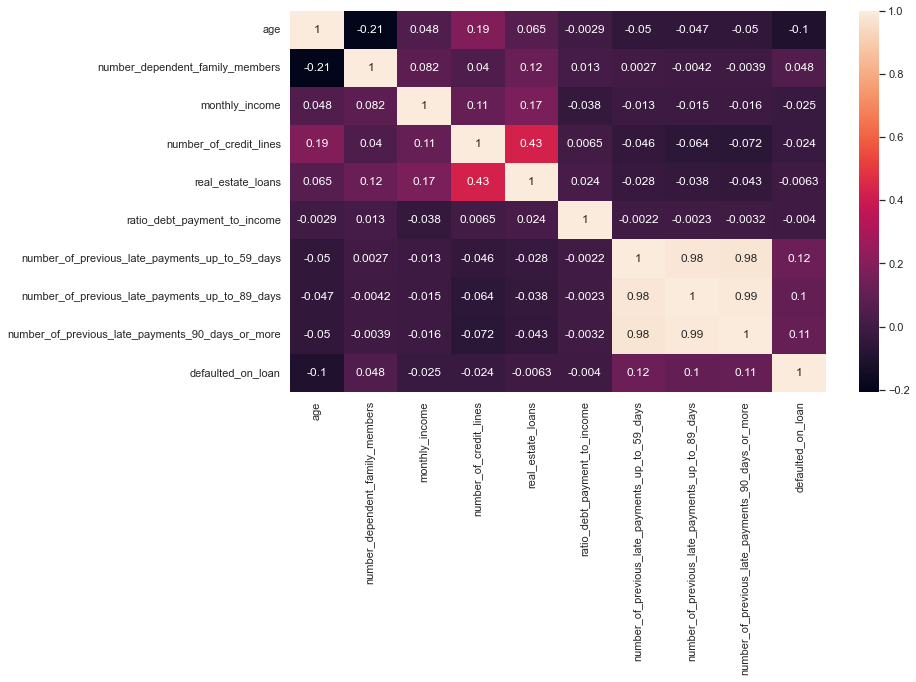

In [17]:
x = df.corr()
fig = plt.figure(figsize=(12,7))
ax = sns.heatmap(x,annot=True) 


<i><font size='4'>There are <font color='red' > almost no strong relationships </font>  among columns, however there are strong relationship among late payments columns which is quite understandable. </font>

In [18]:
import warnings
warnings.filterwarnings('ignore')  #just to ignore warnings related to graph.

<i><font size='4'> Now, let's analyze each column one by one.</font>

#### <font size='5'><i>1. Age

In [19]:
df['age'].value_counts()

49.0     1822
47.0     1696
50.0     1696
48.0     1695
46.0     1674
         ... 
99.0        2
98.0        2
101.0       1
102.0       1
103.0       1
Name: age, Length: 82, dtype: int64

In [20]:
print(df.age.min())
print(df.age.max())

21.0
103.0


In [21]:
print(f'Minimum age in our dataset is {df.age.min()}.')
print(f'Maximum age in our dataset is {df.age.max()}.')

Minimum age in our dataset is 21.0.
Maximum age in our dataset is 103.0.


In [22]:
df['age'].nunique() # We can see there are 82 unique ages in this column.
print(f'Number of unique values in the "Age" column is {df.age.nunique()}.')

Number of unique values in the "Age" column is 82.


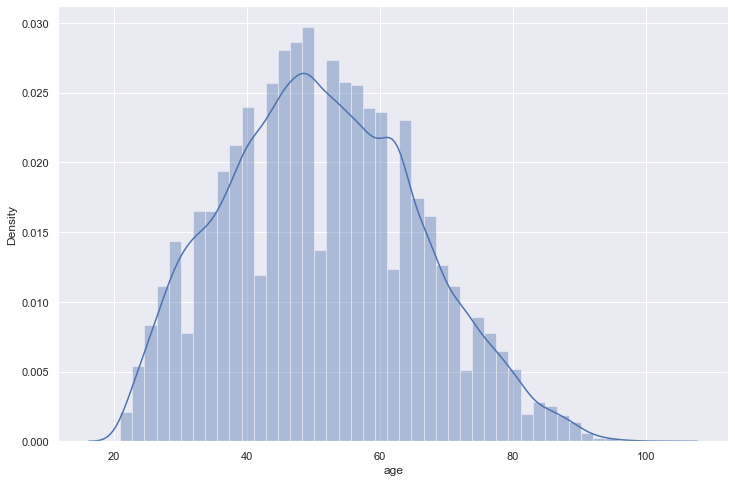

In [23]:
sns.distplot(df['age'], bins=45)
plt.show()  

<i><font size='3'> As we can see from the Distribution plot, our distribution is normal and we have few outliers in our dataset. </font>

In [24]:
print(f'Median age is: {df.age.median()}')
print(f'Mean age is: {df.age.mean()}')

Median age is: 51.0
Mean age is: 51.38891366873279


<i> Having our Mean and Median values so close is powering our idea of having Normal distribution.

<AxesSubplot:xlabel='age'>

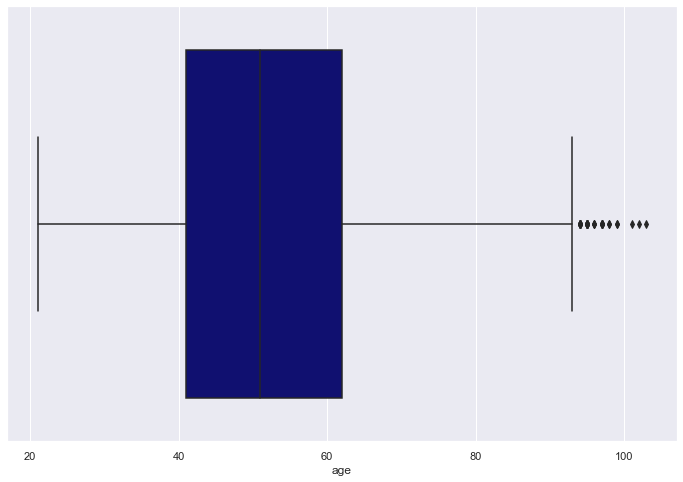

In [25]:
sns.boxplot(df['age'],color='navy')

<i> <font size='3'> Here we can see the outliers as well. </font>

In [26]:
df[df['age'] > 100] #there are 3 people over age 100 which we can call outliers.

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
Id,,,,,,,,,,,
20966,101.0,0.0,2883.0,6.0,0.0,NaN,0.0029642329999999997,2.0,0.0,0.0,1
27516,102.0,1.0,3417.0,7.0,0.0,0.273844,0.109641899,0.0,0.0,0.0,0
70499,103.0,0.0,1600.0,3.0,0.0,0.000000,0.9999998999999999,0.0,0.0,0.0,0


#### <font size='5'><i>2. Number_dependent_family_members

In [27]:
df['number_dependent_family_members'].value_counts()

0.0     37089
1.0     13751
2.0     10230
3.0      4886
4.0      1473
5.0       387
6.0        79
7.0        29
8.0        17
9.0         2
13.0        1
10.0        1
Name: number_dependent_family_members, dtype: int64

In [28]:
df['number_dependent_family_members'].value_counts(normalize='True')

0.0     0.545868
1.0     0.202384
2.0     0.150563
3.0     0.071911
4.0     0.021679
5.0     0.005696
6.0     0.001163
7.0     0.000427
8.0     0.000250
9.0     0.000029
13.0    0.000015
10.0    0.000015
Name: number_dependent_family_members, dtype: float64

<i><font size='3'>As it can be seen from above, more than half of number of dependents is <font color='red'>zero. 

In [29]:
print(df['number_dependent_family_members'].min())
print(df['number_dependent_family_members'].max())

0.0
13.0


In [30]:
print(f'Minimum age in our dataset is {df.number_dependent_family_members.min()}.')
print(f'Maximum age in our dataset is {df.number_dependent_family_members.max()}.')

Minimum age in our dataset is 0.0.
Maximum age in our dataset is 13.0.


In [31]:
df['number_dependent_family_members'].nunique() # We can see there are 12 unique values in this column.
print(f'Number of unique values in the "number_dependent_family_members" column is {df.number_dependent_family_members.nunique()}.')

Number of unique values in the "number_dependent_family_members" column is 12.


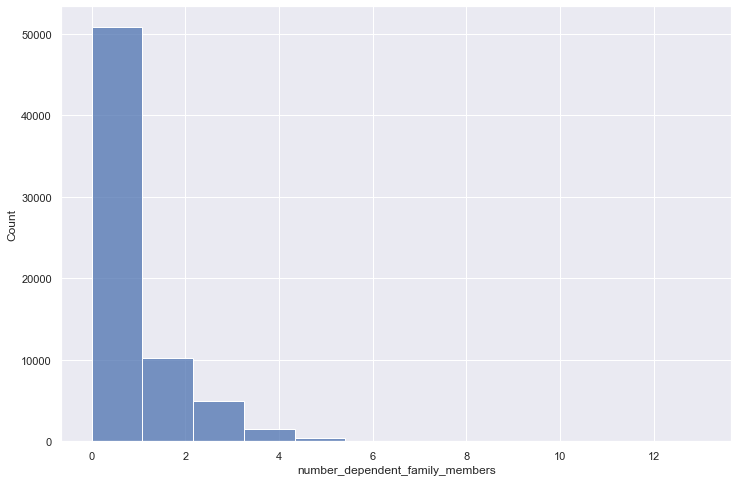

In [32]:
sns.histplot(df['number_dependent_family_members'], bins=12)
plt.show()  

<i><font size='4'> It kind of looks like <font color='red'> "Exponential Distribution"

<i><font size='3'> We have some outliers as well.

In [33]:
print(f'Median "number_dependent_family_members" is: {df.number_dependent_family_members.median()}')
print(f'Mean "number_dependent_family_members" is: {df.number_dependent_family_members.mean()}')

Median "number_dependent_family_members" is: 0.0
Mean "number_dependent_family_members" is: 0.8470086099050703


<AxesSubplot:xlabel='number_dependent_family_members'>

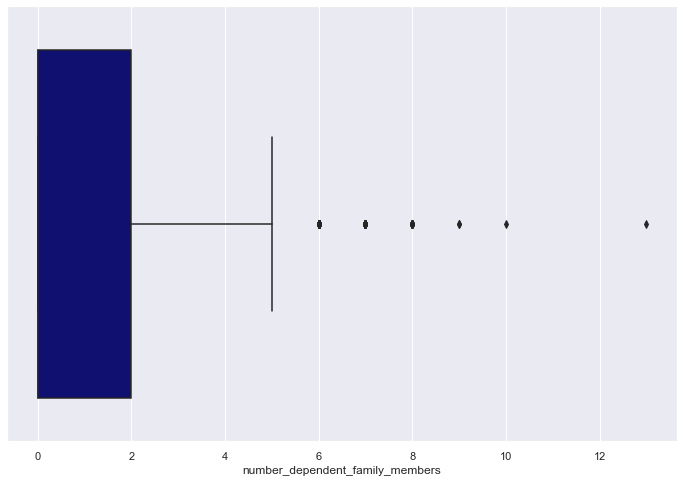

In [34]:
 sns.boxplot(df['number_dependent_family_members'],color='navy') 

<i> <font size='3'> Here we can see the outliers as well. </font>

In [35]:
df[df['number_dependent_family_members'] > 8]   

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
Id,,,,,,,,,,,
12932,53.0,13.0,3333.0,3.0,1.0,0.230054,0.9999998999999999,1.0,0.0,1.0,0
16205,60.0,10.0,7500.0,10.0,0.0,0.133582,0.079193843,0.0,0.0,0.0,0
21789,37.0,9.0,3300.0,9.0,0.0,NaN,0.494849414,0.0,0.0,1.0,0
69154,38.0,9.0,2789.0,5.0,1.0,0.643728,"0,9999998999999999",0.0,0.0,0.0,0


<i>There are 4 rows which has "Number_dependent_family_members" over 8.

#### <font size='5'><i> 3. Monthly_income

In [36]:
df['monthly_income'].value_counts()  #As it is truly numeric column, we cannot say anything from here.

5000.0     1546
4000.0     1115
6000.0     1064
3000.0      985
0.0         864
           ... 
21624.0       1
5214.0        1
8282.0        1
10515.0       1
6374.0        1
Name: monthly_income, Length: 11007, dtype: int64

In [37]:
print(df['monthly_income'].min())
print(df['monthly_income'].max())  

0.0
1560100.0


<font size='3'><i>We definitely have huge range of income and therefore outliers.</font>

In [38]:
print(f'Minimum monthly_income in our dataset is {df.monthly_income.min()}')
print(f'Maximum monthly_income in our dataset is {df.monthly_income.max()}')

Minimum monthly_income in our dataset is 0.0
Maximum monthly_income in our dataset is 1560100.0


<AxesSubplot:xlabel='monthly_income', ylabel='Count'>

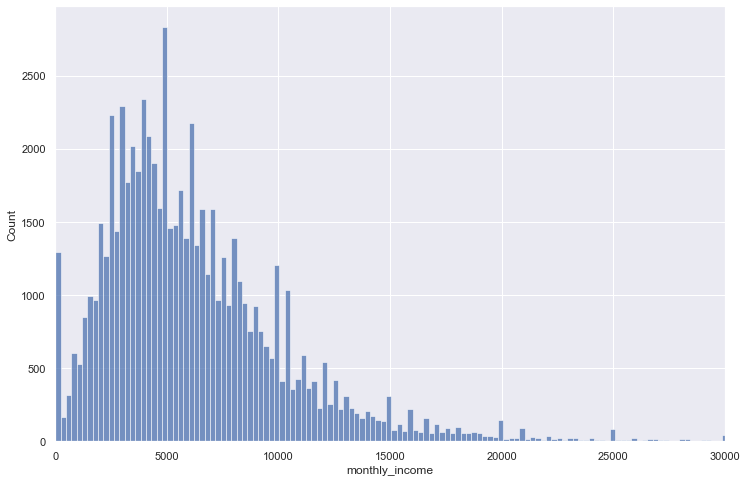

In [39]:
plt.xlim(0,30000)
sns.histplot(df['monthly_income'])

<font size='3'><i> I had to set xlim in order to have clear plot, without setting limit <font color='red' > outliers </font> are affecting so much. We have very much right skewed data.

In [40]:
print(f'Median monthly_income is: {df.monthly_income.median()}')
print(f'Mean monthly_income is: {df.monthly_income.mean()}')

Median monthly_income is: 5400.0
Mean monthly_income is: 6624.387784413032


<i> Because of existing outliers in this column, we need to use Median as Strategy for imputation.

<AxesSubplot:xlabel='monthly_income'>

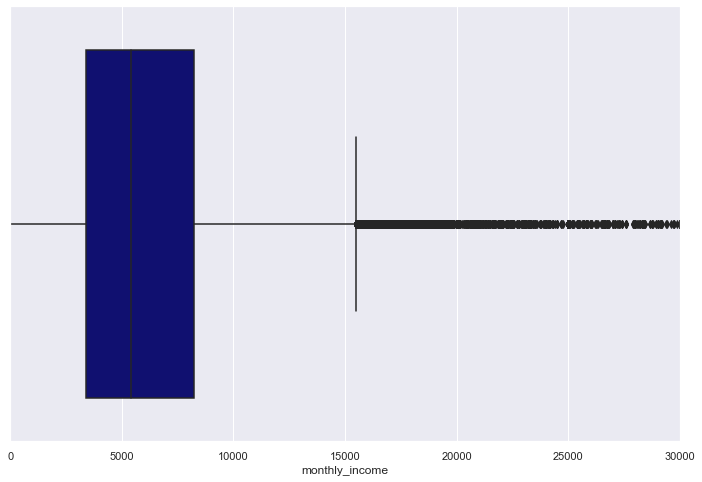

In [41]:
plt.xlim(0,30000)
sns.boxplot(df['monthly_income'],color='navy')

<i>Same applies to the BoxPlot as well. We have very much outliers and in case of model builing we definitely need to deal with these Outliers.

In [42]:
df[df['monthly_income'] > 100000]

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
Id,,,,,,,,,,,
2100,50.0,1.0,143000.0,NaN,1.0,0.008671,"0,0",0.0,0.0,0.0,0
6464,64.0,1.0,582369.0,11.0,NaN,0.004003,0.439684124,0.0,0.0,0.0,0
8203,44.0,1.0,1072500.0,9.0,2.0,0.004537,NaN,1.0,0.0,0.0,0
10882,44.0,0.0,440000.0,2.0,NaN,0.002459,0.946866643,2.0,1.0,0.0,0
11391,56.0,NaN,110775.0,NaN,2.0,0.038005,0.404801425,0.0,0.0,0.0,0
11430,83.0,NaN,629000.0,3.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
15696,43.0,2.0,112000.0,19.0,4.0,0.092633,0.320561439,0.0,0.0,0.0,0
16553,35.0,2.0,114344.0,11.0,2.0,0.017841,0.828865884,0.0,0.0,0.0,0
18057,53.0,0.0,112100.0,16.0,1.0,NaN,0.000559034,0.0,0.0,0.0,0


<i>We have 37 rows with monthly_income over than 100,000$.

#### <font size='5'><i> 4. Number_of_credit_lines

In [43]:
df['number_of_credit_lines'].value_counts()

6.0     5955
7.0     5840
5.0     5535
8.0     5524
9.0     5183
4.0     4855
10.0    4463
11.0    3821
3.0     3628
12.0    3279
13.0    2683
2.0     2556
14.0    2119
15.0    1744
1.0     1633
16.0    1390
17.0    1099
18.0     881
19.0     657
0.0      638
20.0     587
21.0     415
22.0     331
23.0     252
24.0     208
25.0     160
26.0     113
27.0     100
28.0      75
29.0      57
30.0      45
31.0      36
32.0      32
33.0      20
34.0      19
36.0      11
35.0      11
40.0       6
39.0       5
42.0       5
45.0       5
38.0       4
37.0       3
48.0       3
43.0       3
49.0       3
54.0       3
46.0       2
52.0       2
57.0       2
53.0       1
51.0       1
44.0       1
50.0       1
56.0       1
47.0       1
Name: number_of_credit_lines, dtype: int64

In [44]:
print(df.number_of_credit_lines.min())
print(df.number_of_credit_lines.max())

0.0
57.0


In [45]:
print(f'Minimum number of credit lines in our dataset is {df.number_of_credit_lines.min()}.')
print(f'Maximum number of credit lines in our dataset is {df.number_of_credit_lines.max()}.')

Minimum number of credit lines in our dataset is 0.0.
Maximum number of credit lines in our dataset is 57.0.


In [46]:
df['number_of_credit_lines'].nunique() # We can see there are 56 unique values in this column.
print(f'Number of unique values in the "number_of_credit_lines" column is {df.number_of_credit_lines.nunique()}.')

Number of unique values in the "number_of_credit_lines" column is 56.


<AxesSubplot:xlabel='number_of_credit_lines', ylabel='Density'>

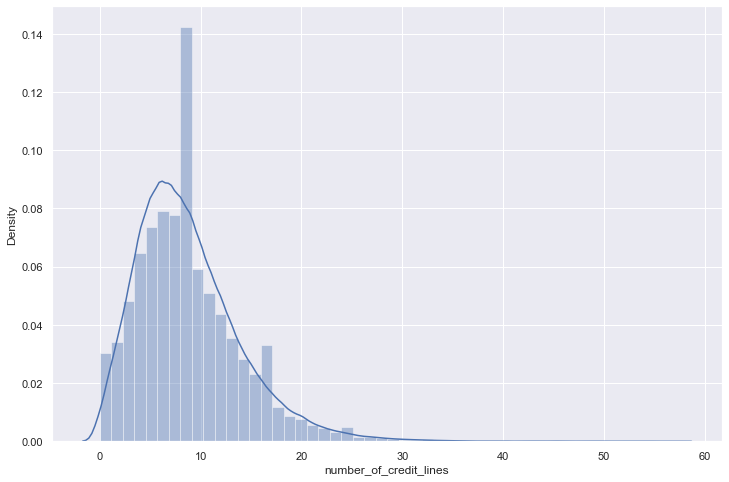

In [47]:
sns.distplot(df['number_of_credit_lines'])

<i><font size='3'> As it is seen from the distribution plot, we have right-skewed distribution and a few outliers.

In [48]:
print(f'Median number_of_credit_lines is: {df.number_of_credit_lines.median()}')
print(f'Mean number_of_credit_lines is: {df.number_of_credit_lines.mean()}')

Median number_of_credit_lines is: 8.0
Mean number_of_credit_lines is: 8.756192525035223


<AxesSubplot:xlabel='number_of_credit_lines'>

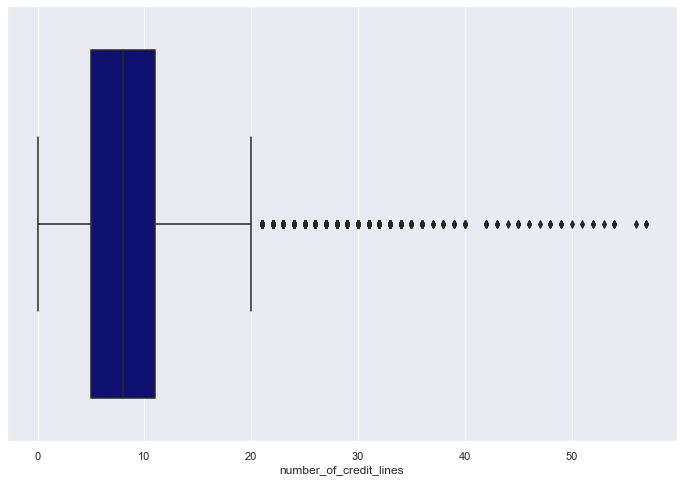

In [49]:
sns.boxplot(df['number_of_credit_lines'],color='navy')

<i>Same applies to the BoxPlot as well. We have very much outliers and in case of model builing we definitely need to deal with these Outliers.

In [50]:
df[df['number_of_credit_lines'] > 30]

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
Id,,,,,,,,,,,
85,48.0,1.0,3000.0,32.0,1.0,0.775075,0.088946475,0.0,0.0,0.0,0
655,67.0,0.0,7966.0,32.0,NaN,0.413832,0.418062726,0.0,0.0,0.0,0
708,54.0,1.0,6416.0,32.0,1.0,0.390681,NaN,NaN,0.0,0.0,0
1295,74.0,0.0,10500.0,36.0,1.0,0.206742,0.152357769,0.0,0.0,0.0,0
1398,33.0,1.0,8500.0,35.0,2.0,0.469357,0.38843440799999995,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
70920,64.0,1.0,9916.0,50.0,2.0,0.793284,0.155242463,NaN,0.0,0.0,0
71314,70.0,2.0,NaN,56.0,0.0,0.074935,"0,020225958",0.0,0.0,0.0,0
71585,62.0,NaN,12500.0,47.0,2.0,0.269178,0.001821271,0.0,NaN,0.0,0


#### <font size='5'><i> 5. Real_estate_loans

In [51]:
df['real_estate_loans'].value_counts()

0.0     24767
1.0     23657
2.0     15070
3.0      3097
4.0      1061
5.0       333
6.0       172
7.0        73
8.0        41
9.0        30
10.0       21
13.0        8
11.0        7
12.0        7
15.0        4
14.0        3
19.0        1
18.0        1
16.0        1
25.0        1
Name: real_estate_loans, dtype: int64

In [52]:
df['real_estate_loans'].value_counts(normalize='True')

0.0     0.362329
1.0     0.346090
2.0     0.220467
3.0     0.045308
4.0     0.015522
5.0     0.004872
6.0     0.002516
7.0     0.001068
8.0     0.000600
9.0     0.000439
10.0    0.000307
13.0    0.000117
11.0    0.000102
12.0    0.000102
15.0    0.000059
14.0    0.000044
19.0    0.000015
18.0    0.000015
16.0    0.000015
25.0    0.000015
Name: real_estate_loans, dtype: float64

<i> Number of real estate loans are mainly consist of 0 , 1 and 2

In [53]:
print(df['real_estate_loans'].min())
print(df['real_estate_loans'].max())

0.0
25.0


In [54]:
print(f'Minimum real_estate_loans in our dataset is {df.real_estate_loans.min()}.')
print(f'Maximum real_estate_loans in our dataset is {df.real_estate_loans.max()}.')

Minimum real_estate_loans in our dataset is 0.0.
Maximum real_estate_loans in our dataset is 25.0.


In [55]:
df['real_estate_loans'].nunique() # We can see there are 20 unique values in this column.
print(f'Number of unique values in the "real_estate_loans" column is {df.real_estate_loans.nunique()}.')

Number of unique values in the "real_estate_loans" column is 20.


<AxesSubplot:xlabel='real_estate_loans', ylabel='Density'>

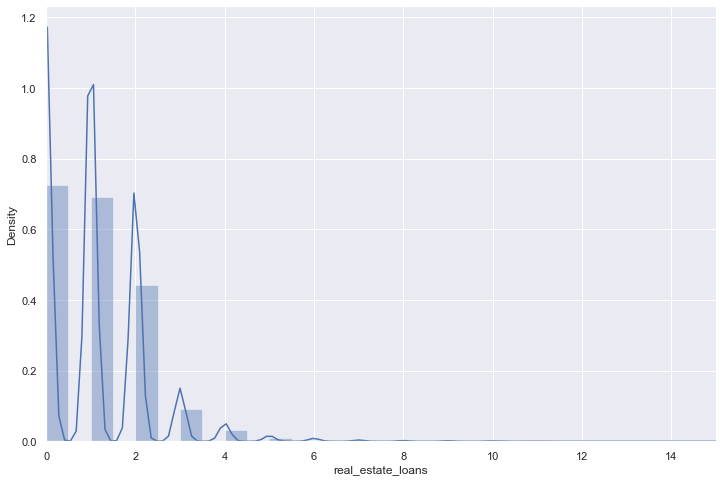

In [56]:
plt.xlim(0,15)
sns.distplot(df['real_estate_loans'])

<i> We, can say we have some <font color='red'> Outliers.

In [57]:
print(f'Median real_estate_loans is: {df.real_estate_loans.median()}')
print(f'Mean real_estate_loans is: {df.real_estate_loans.mean()}')

Median real_estate_loans is: 1.0
Mean real_estate_loans is: 1.0502962475312705


<AxesSubplot:xlabel='real_estate_loans'>

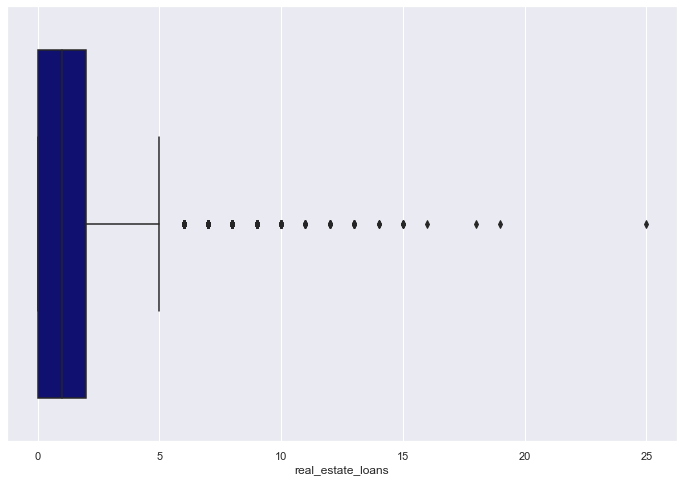

In [58]:
sns.boxplot(df['real_estate_loans'],color='navy')

In [59]:
df[df['real_estate_loans'] > 10]

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
Id,,,,,,,,,,,
2007,67.0,0.0,10000.0,29.0,18.0,3.489351,0.065386865,0.0,0.0,0.0,0
4534,69.0,0.0,5083.0,34.0,16.0,2.242329,0.009371143,0.0,0.0,0.0,0
4597,NaN,0.0,4500.0,23.0,11.0,1.789158,"0,34429737299999996",0.0,1.0,14.0,1
7963,57.0,0.0,19250.0,21.0,12.0,0.711028,"0,012037866000000001",1.0,0.0,0.0,0
8477,57.0,0.0,2512.0,19.0,11.0,2.504576,"0,0",0.0,0.0,0.0,0
13255,33.0,0.0,18500.0,36.0,13.0,0.702016,0.15859664699999998,0.0,0.0,0.0,1
13462,63.0,0.0,11600.0,36.0,11.0,0.452030,0.036079078,0.0,0.0,0.0,0
17196,65.0,0.0,19950.0,25.0,13.0,1.308005,0.045296114000000005,0.0,0.0,0.0,0
24655,36.0,0.0,12500.0,NaN,15.0,2.516039,0.152836788,1.0,0.0,0.0,1


#### <font size='5'><i> 6. Ratio_debt_payment_to_income

In [60]:
df['ratio_debt_payment_to_income'].value_counts()

0.000000    1408
1.000000      12
0.001200      11
8.000000      11
2.000000       9
            ... 
0.399049       1
0.058801       1
0.108820       1
0.380680       1
0.304626       1
Name: ratio_debt_payment_to_income, Length: 62311, dtype: int64

In [61]:
print(df['ratio_debt_payment_to_income'].min())
print(df['ratio_debt_payment_to_income'].max())

0.0
61106.5


In [62]:
print(f'Minimum ratio_debt_payment_to_income in our dataset is {df.ratio_debt_payment_to_income.min()}.')
print(f'Maximum ratio_debt_payment_to_income in our dataset is {df.ratio_debt_payment_to_income.max()}.')

Minimum ratio_debt_payment_to_income in our dataset is 0.0.
Maximum ratio_debt_payment_to_income in our dataset is 61106.5.


<AxesSubplot:xlabel='ratio_debt_payment_to_income', ylabel='Density'>

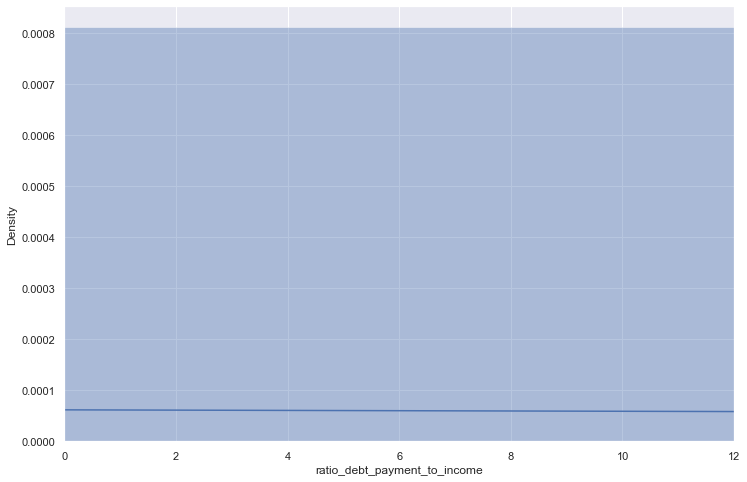

In [63]:
plt.xlim(0,12)
sns.distplot(df['ratio_debt_payment_to_income'])

In [64]:
print(f'Median ratio_debt_payment_to_income is: {df.ratio_debt_payment_to_income.median()}')
print(f'Mean ratio_debt_payment_to_income is: {df.ratio_debt_payment_to_income.mean()}')

Median ratio_debt_payment_to_income is: 0.294672852
Mean ratio_debt_payment_to_income is: 26.524004587192582


<AxesSubplot:xlabel='ratio_debt_payment_to_income'>

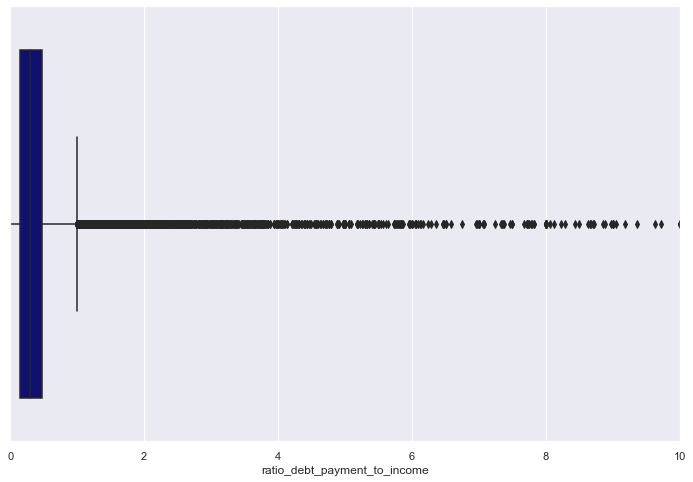

In [65]:
plt.xlim(0,10)
sns.boxplot(df['ratio_debt_payment_to_income'],color='navy')

<i><font size='4'>There are very much outliers in this column.

In [66]:
df[df['ratio_debt_payment_to_income'] > 1000]

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
Id,,,,,,,,,,,
56,52.0,2.0,1.0,9.0,1.0,1100.5,0.008197396,0.0,0.0,0.0,0
264,62.0,0.0,1.0,8.0,1.0,1151.0,0.095732237,0.0,0.0,0.0,0
639,NaN,3.0,0.0,NaN,1.0,1471.0,"0,110583625",0.0,NaN,0.0,0
743,43.0,0.0,0.0,8.0,2.0,9908.0,NaN,NaN,0.0,0.0,0
748,50.0,1.0,0.0,11.0,2.0,3740.0,0.085941332,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
71864,41.0,0.0,0.0,13.0,1.0,1118.0,0.018737181999999998,0.0,0.0,NaN,0
71902,36.0,3.0,0.0,7.0,1.0,1695.0,0.027256155,0.0,0.0,0.0,0
71936,69.0,1.0,0.0,8.0,NaN,1248.0,0.080083629,0.0,0.0,0.0,0


#### <font size='5'><i> 7. Credit_line_utilization

In [67]:
df['credit_line_utilization'] = df['credit_line_utilization'].str.replace(',' , '.').astype(float) 

In [68]:
df_test['credit_line_utilization'] = df_test['credit_line_utilization'].str.replace(',' , '.').astype(float)

<i><font size='4' color='black'> Credit_line_utilization column had "object" datatype. Therefore, after removing unnecessary commas, I have changed the type to float </font>

In [69]:
df['credit_line_utilization'].value_counts()

0.000000    4364
1.000000    4071
1.000000       8
0.950100       6
1.003322       4
            ... 
0.169971       1
0.063527       1
0.412815       1
0.013290       1
0.447266       1
Name: credit_line_utilization, Length: 56814, dtype: int64

In [70]:
print(df['credit_line_utilization'].min())
print(df['credit_line_utilization'].max())

0.0
29110.0


In [71]:
print(f'Minimum credit_line_utilization in our dataset is {df.credit_line_utilization.min()}.')
print(f'Maximum credit_line_utilization in our dataset is {df.credit_line_utilization.max()}.')

Minimum credit_line_utilization in our dataset is 0.0.
Maximum credit_line_utilization in our dataset is 29110.0.


<AxesSubplot:xlabel='credit_line_utilization', ylabel='Density'>

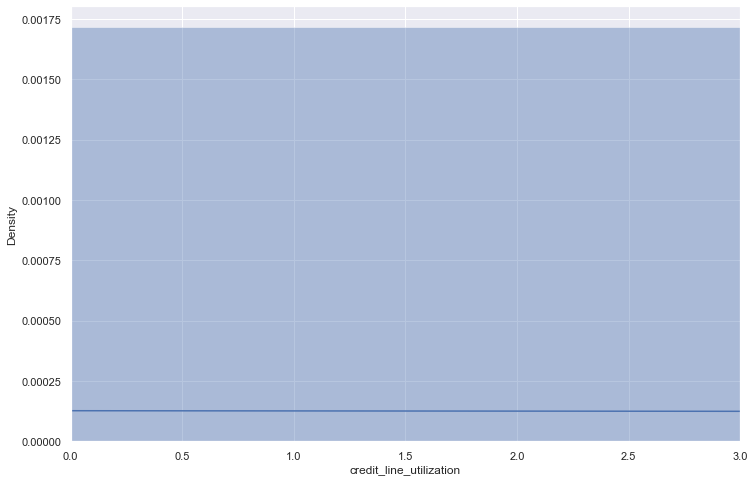

In [72]:
plt.xlim(0,3)
sns.distplot(df['credit_line_utilization'])

In [73]:
print(f'Median credit_line_utilization is: {df.credit_line_utilization.median()}')
print(f'Mean credit_line_utilization is: {df.credit_line_utilization.mean()}')

Median credit_line_utilization is: 0.176499646
Mean credit_line_utilization is: 5.225039965916414


<AxesSubplot:xlabel='credit_line_utilization'>

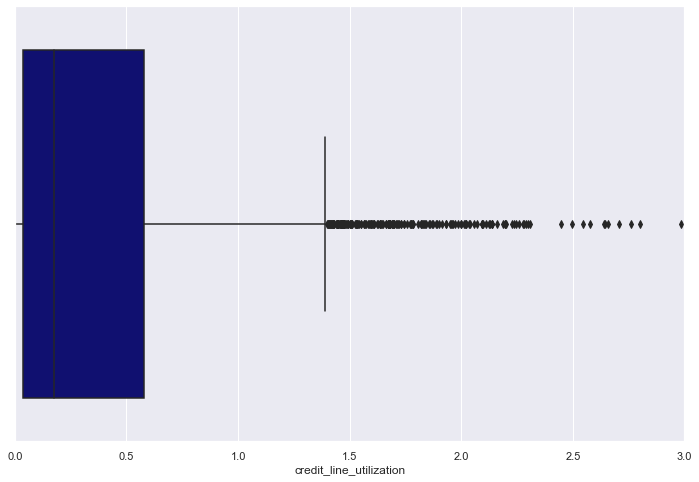

In [74]:
plt.xlim(0,3)
sns.boxplot(df['credit_line_utilization'],color='navy')

<I> In order to see the boxplot clearly, I put limit for xlim between 0 and 3

<i><font size='4'>There are very much outliers in this column.

#### <font size='5'><i> 8. Number_of_previous_late_payments_up_to_59_days

In [75]:
df['number_of_previous_late_payments_up_to_59_days'].value_counts()

0.0     56577
1.0      7573
2.0      2213
3.0       863
4.0       374
5.0       156
98.0       90
6.0        73
7.0        25
8.0        14
96.0        3
9.0         3
10.0        2
Name: number_of_previous_late_payments_up_to_59_days, dtype: int64

In [76]:
df['number_of_previous_late_payments_up_to_59_days'].value_counts(normalize=True)

0.0     0.832431
1.0     0.111423
2.0     0.032560
3.0     0.012698
4.0     0.005503
5.0     0.002295
98.0    0.001324
6.0     0.001074
7.0     0.000368
8.0     0.000206
96.0    0.000044
9.0     0.000044
10.0    0.000029
Name: number_of_previous_late_payments_up_to_59_days, dtype: float64

In [77]:
print(df['number_of_previous_late_payments_up_to_59_days'].min())
print(df['number_of_previous_late_payments_up_to_59_days'].max())

0.0
98.0


In [78]:
print(f'Minimum number_of_previous_late_payments_up_to_59_days in our dataset is {df.number_of_previous_late_payments_up_to_59_days.min()}.')
print(f'Maximum number_of_previous_late_payments_up_to_59_days in our dataset is {df.number_of_previous_late_payments_up_to_59_days.max()}.')

Minimum number_of_previous_late_payments_up_to_59_days in our dataset is 0.0.
Maximum number_of_previous_late_payments_up_to_59_days in our dataset is 98.0.


In [79]:
df['number_of_previous_late_payments_up_to_59_days'].nunique() # We can see there are 13 unique values in this column.
print(f'Number of unique values in the "number_of_previous_late_payments_up_to_59_days" column is {df.number_of_previous_late_payments_up_to_59_days.nunique()}.')

Number of unique values in the "number_of_previous_late_payments_up_to_59_days" column is 13.


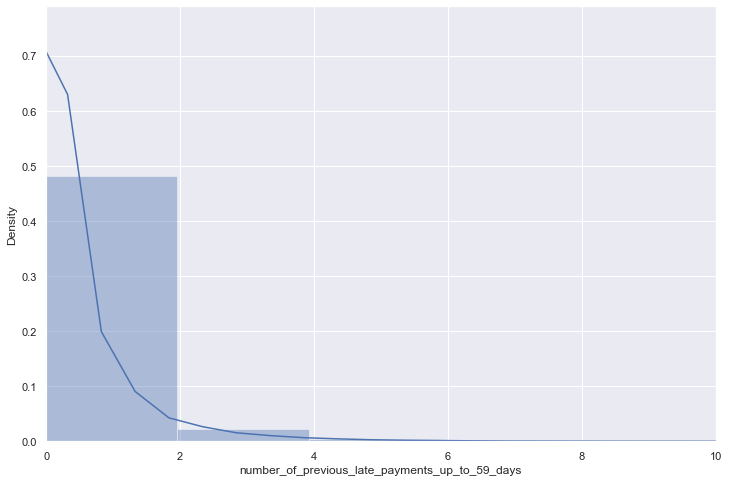

In [80]:
plt.xlim(0,10)
sns.distplot(df['number_of_previous_late_payments_up_to_59_days'])
plt.show()  

In [81]:
print(f'Median number_of_previous_late_payments_up_to_59_days is: {df.number_of_previous_late_payments_up_to_59_days.median()}')
print(f'Mean number_of_previous_late_payments_up_to_59_days is: {df.number_of_previous_late_payments_up_to_59_days.mean()}')

Median number_of_previous_late_payments_up_to_59_days is: 0.0
Mean number_of_previous_late_payments_up_to_59_days is: 0.3934908630785981


<AxesSubplot:xlabel='number_of_previous_late_payments_up_to_59_days'>

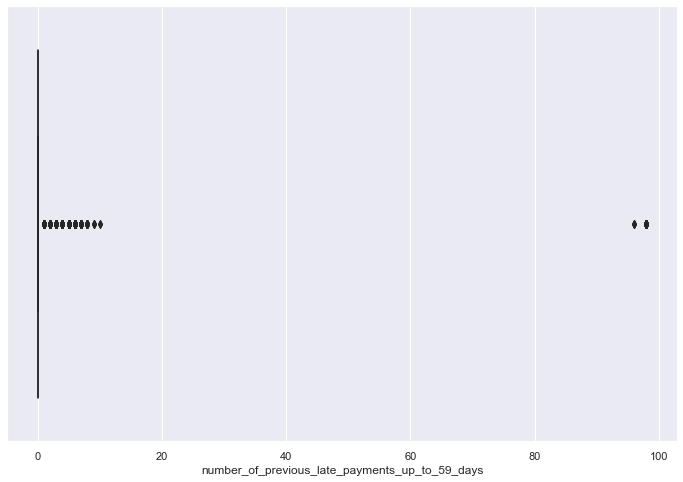

In [82]:
sns.boxplot(df['number_of_previous_late_payments_up_to_59_days'],color='navy')

<i> As, more than 80 percent rows has 0 late payments, we cannot see much from the boxplot, but the existing outliers

#### <font size='5'><i> 9. Number_of_previous_late_payments_up_to_89_days

In [83]:
df['number_of_previous_late_payments_up_to_89_days'].value_counts()

0.0     62824
1.0      2672
2.0       499
3.0       154
98.0       90
4.0        50
5.0        13
6.0         7
96.0        4
7.0         2
9.0         1
Name: number_of_previous_late_payments_up_to_89_days, dtype: int64

In [84]:
df['number_of_previous_late_payments_up_to_89_days'].value_counts(normalize=True)

0.0     0.947343
1.0     0.040292
2.0     0.007525
3.0     0.002322
98.0    0.001357
4.0     0.000754
5.0     0.000196
6.0     0.000106
96.0    0.000060
7.0     0.000030
9.0     0.000015
Name: number_of_previous_late_payments_up_to_89_days, dtype: float64

In [85]:
print(df['number_of_previous_late_payments_up_to_89_days'].min())
print(df['number_of_previous_late_payments_up_to_89_days'].max())

0.0
98.0


In [86]:
print(f'Minimum number_of_previous_late_payments_up_to_89_days in our dataset is {df.number_of_previous_late_payments_up_to_89_days.min()}.')
print(f'Maximum number_of_previous_late_payments_up_to_89_days in our dataset is {df.number_of_previous_late_payments_up_to_89_days.max()}.')

Minimum number_of_previous_late_payments_up_to_89_days in our dataset is 0.0.
Maximum number_of_previous_late_payments_up_to_89_days in our dataset is 98.0.


In [87]:
df['number_of_previous_late_payments_up_to_89_days'].nunique() # We can see there are 11 unique values in this column.
print(f'Number of unique values in the "number_of_previous_late_payments_up_to_89_days" column is {df.number_of_previous_late_payments_up_to_89_days.nunique()}.')

Number of unique values in the "number_of_previous_late_payments_up_to_89_days" column is 11.


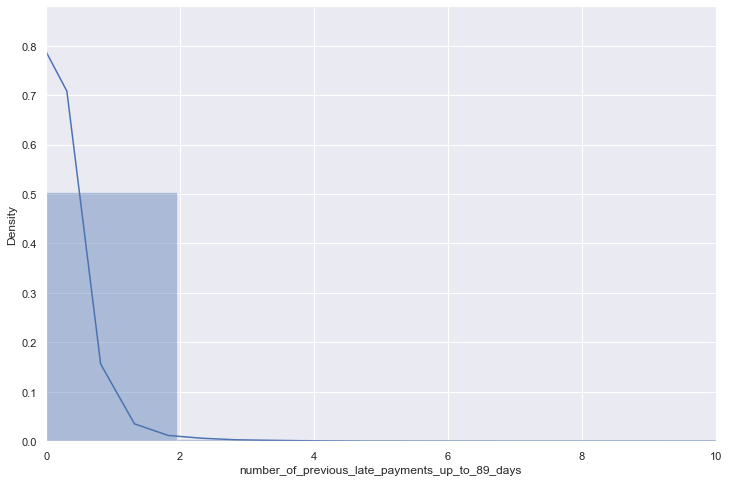

In [88]:
plt.xlim(0,10)
sns.distplot(df['number_of_previous_late_payments_up_to_89_days'])
plt.show()  

In [89]:
print(f'Median number_of_previous_late_payments_up_to_89_days is: {df.number_of_previous_late_payments_up_to_89_days.median()}')
print(f'Mean number_of_previous_late_payments_up_to_89_days is: {df.number_of_previous_late_payments_up_to_89_days.mean()}')

Median number_of_previous_late_payments_up_to_89_days is: 0.0
Mean number_of_previous_late_payments_up_to_89_days is: 0.20607394897159056


<AxesSubplot:xlabel='number_of_previous_late_payments_up_to_89_days'>

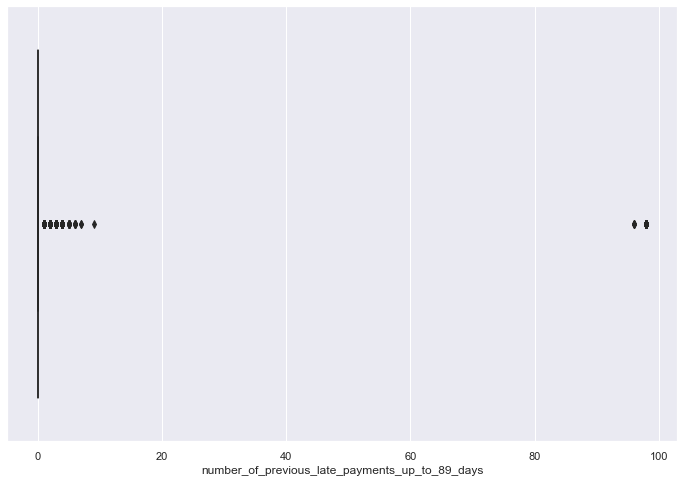

In [90]:
# plt.xlim(0,3)
sns.boxplot(df['number_of_previous_late_payments_up_to_89_days'],color='navy')

<i> As, more than 94 percent rows has 0 late payments, we cannot see much from the boxplot, but the existing outliers

#### <font size='5'><i> 10. Number_of_previous_late_payments_90_days_or_more

In [91]:
df['number_of_previous_late_payments_90_days_or_more'].value_counts()

0.0     64702
1.0      2474
2.0       681
3.0       317
4.0       133
98.0       89
5.0        55
6.0        39
7.0        15
8.0        10
9.0         8
96.0        4
10.0        3
13.0        3
14.0        2
15.0        2
11.0        2
17.0        1
Name: number_of_previous_late_payments_90_days_or_more, dtype: int64

In [92]:
df['number_of_previous_late_payments_90_days_or_more'].value_counts(normalize=True)

0.0     0.944004
1.0     0.036096
2.0     0.009936
3.0     0.004625
4.0     0.001940
98.0    0.001299
5.0     0.000802
6.0     0.000569
7.0     0.000219
8.0     0.000146
9.0     0.000117
96.0    0.000058
10.0    0.000044
13.0    0.000044
14.0    0.000029
15.0    0.000029
11.0    0.000029
17.0    0.000015
Name: number_of_previous_late_payments_90_days_or_more, dtype: float64

In [93]:
print(df['number_of_previous_late_payments_90_days_or_more'].min())
print(df['number_of_previous_late_payments_90_days_or_more'].max())

0.0
98.0


In [94]:
print(f'Minimum number_of_previous_late_payments_90_days_or_more in our dataset is {df.number_of_previous_late_payments_90_days_or_more.min()}.')
print(f'Maximum number_of_previous_late_payments_90_days_or_more in our dataset is {df.number_of_previous_late_payments_90_days_or_more.max()}.')

Minimum number_of_previous_late_payments_90_days_or_more in our dataset is 0.0.
Maximum number_of_previous_late_payments_90_days_or_more in our dataset is 98.0.


In [95]:
df['number_of_previous_late_payments_90_days_or_more'].nunique() # We can see there are 18 unique values in this column.
print(f'Number of unique values in the "number_of_previous_late_payments_90_days_or_more" column is {df.number_of_previous_late_payments_90_days_or_more.nunique()}.')

Number of unique values in the "number_of_previous_late_payments_90_days_or_more" column is 18.


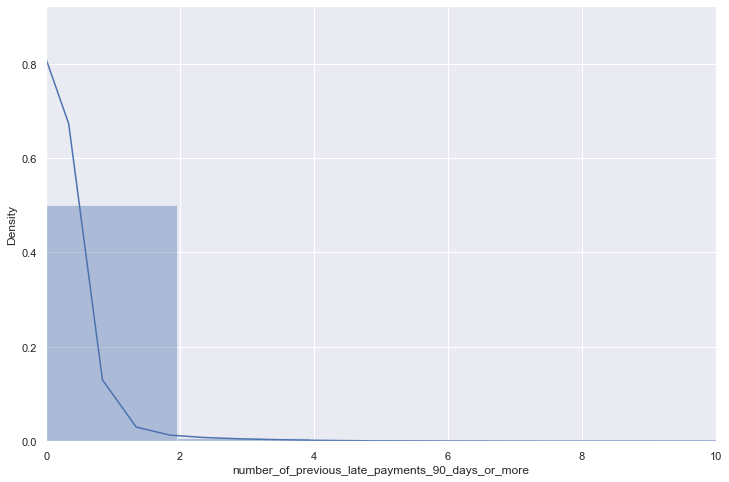

In [96]:
plt.xlim(0,10)
sns.distplot(df['number_of_previous_late_payments_90_days_or_more'])
plt.show()  

In [97]:
print(f'Median number_of_previous_late_payments_90_days_or_more is: {df.number_of_previous_late_payments_90_days_or_more.median()}')
print(f'Mean number_of_previous_late_payments_90_days_or_more is: {df.number_of_previous_late_payments_90_days_or_more.mean()}')

Median number_of_previous_late_payments_90_days_or_more is: 0.0
Mean number_of_previous_late_payments_90_days_or_more is: 0.22405894368252116


<AxesSubplot:xlabel='number_of_previous_late_payments_90_days_or_more'>

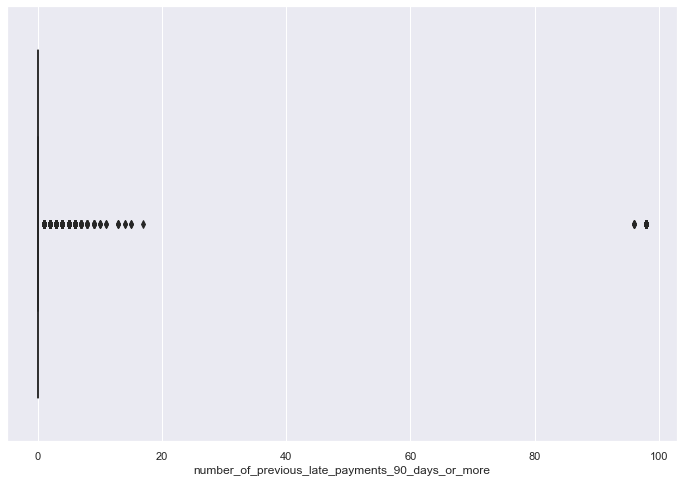

In [98]:
# plt.xlim(0,3)
sns.boxplot(df['number_of_previous_late_payments_90_days_or_more'],color='navy')

<i> As, more than 80 percent rows has 0 late payments, we cannot see much from the boxplot, but the existing outliers

## Target column (y_train)

#### <font size='5'><i> Defaulted on Loan

In [99]:
df['defaulted_on_loan'].value_counts()

0    67148
1     5013
Name: defaulted_on_loan, dtype: int64

In [100]:
df['defaulted_on_loan'].value_counts(normalize=True)

0    0.93053
1    0.06947
Name: defaulted_on_loan, dtype: float64

<i><font size='4'>We definitely have very <font color='red'>imbalanced dataset</font>. Proportion of 1 is 7 percent whereas proportion of 0 is 93 percent.

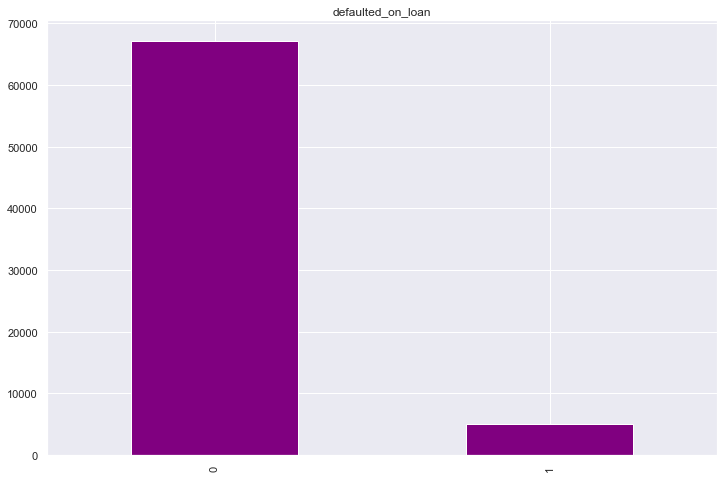

In [101]:
df['defaulted_on_loan'].value_counts().plot(kind='bar', title='defaulted_on_loan',color='purple')
plt.show()

<i> We can see our target column is very <font color='red'> imbalanced </font>, therefore we can use Stratified Shuffle if we want to increase our accuracy.

In [102]:
# %%time
# sns.pairplot(df, hue='defaulted_on_loan')

<i> Dividing data into Categorical and Numeric parts

In [103]:
numeric = df.loc[:, df.columns!= 'defaulted_on_loan'].columns.to_list() #(All of our columns are numeric except target column)

In [104]:
categorical = []

### Dealing with Outliers

<i><font size='4'> During run of Models, I have tried detect Outliers through different methods, such us Isolation Forest and Elliptic Envelope. Hovewer, my model accuracy <font color='red'> increased significantly </font> a bit after dealing with the Outliers manually.

<i><font size='3'> I have dealt with each of the column separately in case of outliers. 

<i><font size='3.5'>For each column, I calculated z-score and changed value of the rows of column to 'NaN' whereas z-score is more than 3 which we can call Outliers. Later, inside of the pipeline, these NaN values will be imputed, which means we are not losing any rows with dropping outlier values.

In [105]:
df.isna().sum()

age                                                 7144
number_dependent_family_members                     4216
monthly_income                                      6016
number_of_credit_lines                              6154
real_estate_loans                                   3806
ratio_debt_payment_to_income                        5608
credit_line_utilization                             6346
number_of_previous_late_payments_up_to_59_days      4195
number_of_previous_late_payments_up_to_89_days      5845
number_of_previous_late_payments_90_days_or_more    3621
defaulted_on_loan                                      0
dtype: int64

In [106]:
df.isna().sum().sum()

52951

<i> Defining X and y for the pipeline and outlier handling will be done on X dataframe.

In [107]:
X = df.drop(columns="defaulted_on_loan",axis=1)
y = df["defaulted_on_loan"]   

In [108]:
X.isna().sum()

age                                                 7144
number_dependent_family_members                     4216
monthly_income                                      6016
number_of_credit_lines                              6154
real_estate_loans                                   3806
ratio_debt_payment_to_income                        5608
credit_line_utilization                             6346
number_of_previous_late_payments_up_to_59_days      4195
number_of_previous_late_payments_up_to_89_days      5845
number_of_previous_late_payments_90_days_or_more    3621
dtype: int64

In [109]:
X.isna().sum().sum()

52951

<i> <font size='4'>Creating z-score columns for each of the columns, and later these z-score column will help us filter these values and replace them with NaN.

In [110]:
X['age_z_score'] = (X['age'] - X.age.mean()) / X.age.std()
X['number_dependent_family_members_score'] = (X['number_dependent_family_members'] - X.number_dependent_family_members.mean()) / X.number_dependent_family_members.std()
X['monthly_income_score'] = (X['monthly_income'] - X.monthly_income.mean()) / X.monthly_income.std()
X['number_of_credit_lines_score'] = (X['number_of_credit_lines'] - X.number_of_credit_lines.mean()) / X.number_of_credit_lines.std()
X['real_estate_loans_score'] = (X['real_estate_loans'] - X.real_estate_loans.mean()) / X.real_estate_loans.std()
X['ratio_debt_payment_to_income_score'] = (X['ratio_debt_payment_to_income'] - X.ratio_debt_payment_to_income.mean()) / X.ratio_debt_payment_to_income.std()
X['credit_line_utilization_score'] = (X['credit_line_utilization'] - X.credit_line_utilization.mean()) / X.credit_line_utilization.std()
X['number_of_previous_late_payments_up_to_59_days_score'] = (X['number_of_previous_late_payments_up_to_59_days'] - X.number_of_previous_late_payments_up_to_59_days.mean()) / X.number_of_previous_late_payments_up_to_59_days.std()
X['number_of_previous_late_payments_up_to_89_days_score'] = (X['number_of_previous_late_payments_up_to_89_days'] - X.number_of_previous_late_payments_up_to_89_days.mean()) / X.number_of_previous_late_payments_up_to_89_days.std()
X['number_of_previous_late_payments_90_days_or_more_score'] = (X['number_of_previous_late_payments_90_days_or_more'] - X.number_of_previous_late_payments_90_days_or_more.mean()) / X.number_of_previous_late_payments_90_days_or_more.std()


<i> <font size='4'>Replacing values of columns where z-score is more than 3.

In [111]:
X.loc[X['number_dependent_family_members_score'] > 3, 'number_dependent_family_members'] = np.nan
X.loc[X['monthly_income_score'] > 3, 'monthly_income'] = np.nan
X.loc[X['number_of_credit_lines_score'] > 3, 'number_of_credit_lines'] = np.nan
X.loc[X['real_estate_loans_score'] > 3, 'real_estate_loans'] = np.nan
X.loc[X['ratio_debt_payment_to_income_score'] > 3, 'ratio_debt_payment_to_income'] = np.nan
X.loc[X['credit_line_utilization_score'] > 3, 'credit_line_utilization'] = np.nan
X.loc[X['number_of_previous_late_payments_up_to_59_days_score'] > 3, 'number_of_previous_late_payments_up_to_59_days'] = np.nan
X.loc[X['number_of_previous_late_payments_up_to_89_days_score'] > 3, 'number_of_previous_late_payments_up_to_89_days'] = np.nan
X.loc[X['number_of_previous_late_payments_90_days_or_more_score'] > 3, 'number_of_previous_late_payments_90_days_or_more'] = np.nan

<i> <font size='4'>Dropping the z-score columns as we achieved our goal.

In [112]:
X = X.drop(columns=['age_z_score', 'number_dependent_family_members_score','monthly_income_score','number_of_credit_lines_score','real_estate_loans_score','ratio_debt_payment_to_income_score','credit_line_utilization_score','number_of_previous_late_payments_up_to_59_days_score','number_of_previous_late_payments_up_to_89_days_score','number_of_previous_late_payments_90_days_or_more_score'])

In [113]:
X.isna().sum() # We can see the change in amounts of missing values for each column.

age                                                 7144
number_dependent_family_members                     4732
monthly_income                                      6297
number_of_credit_lines                              6885
real_estate_loans                                   4509
ratio_debt_payment_to_income                        6094
credit_line_utilization                             6416
number_of_previous_late_payments_up_to_59_days      4288
number_of_previous_late_payments_up_to_89_days      5939
number_of_previous_late_payments_90_days_or_more    3722
dtype: int64

In [114]:
X.isna().sum().sum() 

56026

<i> <font size='4'>Previously total number of missing values was 52,951, however after detecting outliers per each column and changing these values to NaN, total number of NaN values increased to 56,026.